In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np

import cv2

path = '/content/drive/MyDrive/OpenCV-Images/2.JPG'

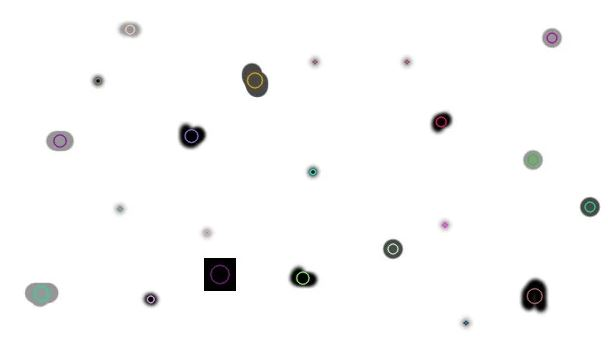

In [3]:
from google.colab.patches import cv2_imshow

img = cv2.imread(path, cv2.IMREAD_COLOR)
cv2_imshow(img)

cv2.waitKey(0)
cv2.destroyAllWindows()

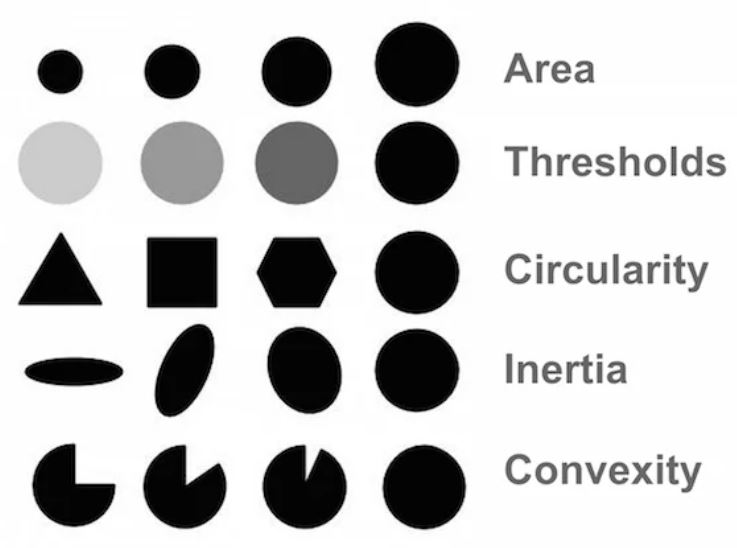

#### **Filtering Blobs by Color, Size and Shape**

1. By Color : [ Note : This feature appears to be broken. I checked the code, and it appears to have a logical error ]

2. Circularity 

 filterByCircularity = 1

3. Convexity

 filterByConvexity = 1
 
 0 ≤ minConvexity ≤ 1

 maxConvexity ( ≤ 1)

4. Inertia Ratio

 filterByInertia = 1
 
 0 ≤ minInertiaRatio ≤ 1and maxInertiaRatio (≤ 1 )

In [ ]:
# Set up the detector with default parameters.
detector = cv2.SimpleBlobDetector()

# Detect blobs.
keypoints = detector.detect(img)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Show keypoints
cv2_imshow(im_with_keypoints) # Keypoints
cv2.waitKey(0)

In [ ]:
# Setup SimpleBlobDetector parameters
params = cv2.SimpleBlobDetector_Params()

# Change thresholds
params.minThreshold = 10;
params.maxThreshold = 200;

# Filter by Area.
params.filterByArea = True
params.minArea = 1500

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.1

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.87

# Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = 0.01

# Create a detector with the parameters
ver = (cv2.__version__).split('.')

if int(ver[0]) < 3 :
  detector = cv2.SimpleBlobDetector(params)
else :
  detector = cv2.SimpleBlobDetector_create(params)